Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2023            265 non-null    float64
 5   2024            265 non-null    float64
dtypes: float64(2), object(4)
memory usage: 12.6+ KB

First 5 rows:


,Country,Country Code,Indicator Name,Indicator Code,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,36749906.0,37885849.0



Basic Statistics:


,2023,2024
count,2.650000e+02,2.650000e+02
mean,3.284356e+08,3.318869e+08
std,1.012519e+09,1.021734e+09
min,9.816000e+03,9.646000e+03
25%,1.827816e+06,1.792179e+06
50%,1.064485e+07,1.087698e+07
75%,6.661761e+07,6.851670e+07
max,8.064977e+09,8.142056e+09


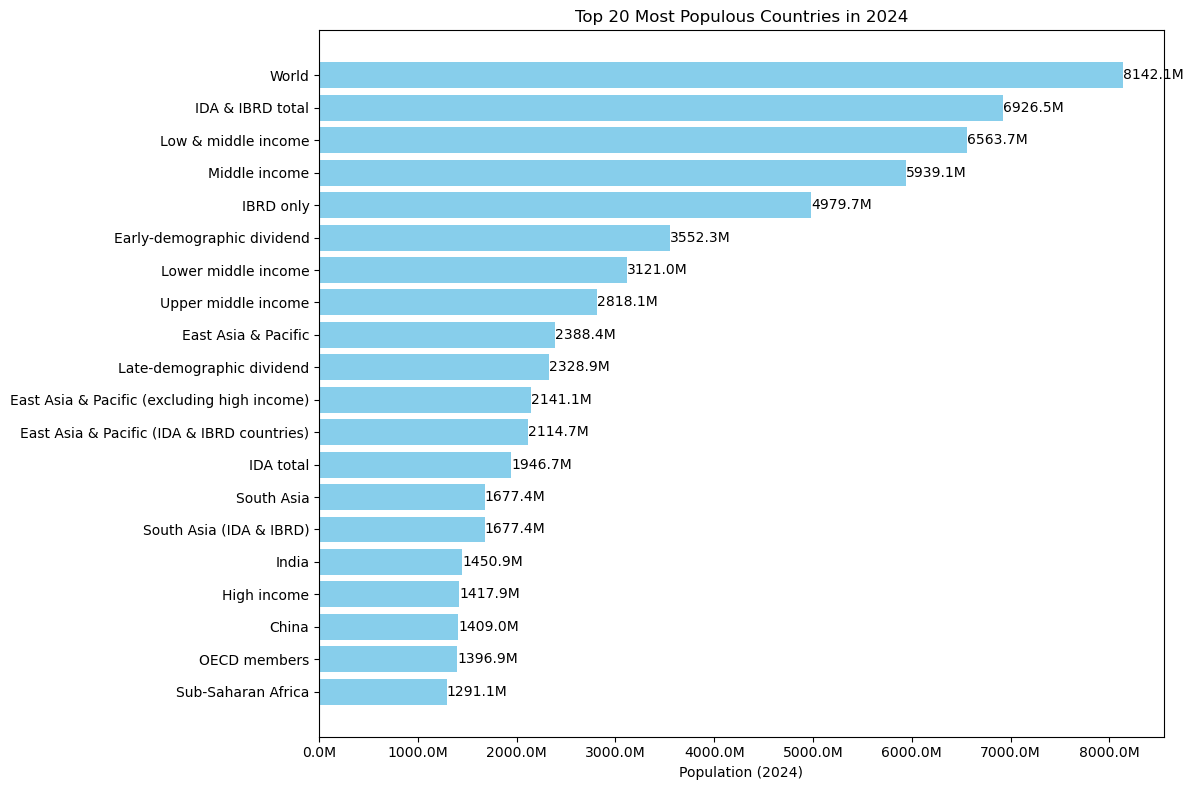

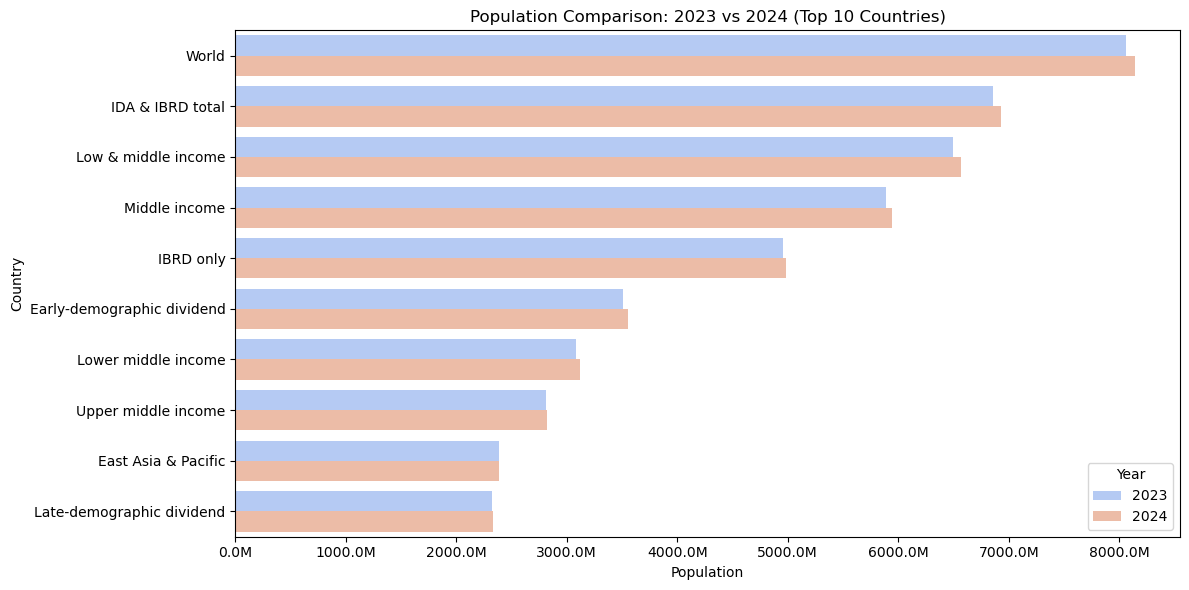

,Country,Country Code,Indicator Name,Indicator Code,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,36749906.0,37885849.0
...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,1682668.0,1527324.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,39390799.0,40583164.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,63212384.0,64007187.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,20723965.0,21314956.0


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

# Load the data
df = pd.read_csv('population_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Display basic statistics
print("\nBasic Statistics:")
display(df.describe())

# Create a bar chart of top 20 most populous countries in 2024
plt.figure(figsize=(12, 8))
top_20 = df.nlargest(20, '2024')
bars = plt.barh(top_20['Country'], top_20['2024'], color='skyblue')
plt.xlabel('Population (2024)')
plt.title('Top 20 Most Populous Countries in 2024')
plt.gca().invert_yaxis()  # Display largest at top

# Format x-axis labels to show in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Add value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width/1e6:.1f}M', 
             ha='left', va='center')

plt.tight_layout()
plt.show()

# Create a comparison between 2023 and 2024 for top 10 countries
top_10 = df.nlargest(10, '2024')[['Country', '2023', '2024']]
top_10_melted = top_10.melt(id_vars='Country', var_name='Year', value_name='Population')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_melted, x='Population', y='Country', hue='Year', palette='coolwarm')
plt.title('Population Comparison: 2023 vs 2024 (Top 10 Countries)')
plt.xlabel('Population')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

# Display a sample of the data in a scrollable table
from IPython.display import display, HTML
display(HTML(df.to_html(max_rows=10, show_dimensions=True)))